In [55]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from IPython import embed
from matplotlib.patches import Rectangle
from matplotlib.cm import get_cmap

# RQ 1,2,3,4,5

In [56]:
data_dir = "/home/roger/Desktop/rllte/mario_q12345"
algorithms = ["Extrinsic", "RND", "ICM", "E3B", "PseudoCounts", "RIDE", "RE3", "NGU", "Disagreement"]
# Initialize an empty list to store dataframes for each experiment
dfs = []
cmap = get_cmap('tab20')

# Loop through each subfolder
for subdir in os.listdir(data_dir):
    # Define the path to the current subfolder
    subfolder_path = os.path.join(data_dir, subdir)
    
    # Check if it's a directory
    if os.path.isdir(subfolder_path):
        # Loop through each file in the subfolder
        for file in os.listdir(subfolder_path):
            if file == ".DS_Store":
                continue
            
            algo_name = None
            for element in algorithms:
                if element.lower() in file:
                    algo_name = element

            try:
                # Define the path to the file
                file_path = os.path.join(subfolder_path, file)
                nested = os.listdir(file_path)

                seed = file_path.split("_")[-1][-1]
                if ".DS_Store" in nested:
                    nested.remove(".DS_Store")
                nested = nested[0]
                
                file_path = os.path.join(file_path, nested, "train.log")
                # Read the data from the file into a dataframe
                df = pd.read_csv(file_path)

                # Add a column to identify the algorithm
                df['RQ'] = subdir
                df["Algorithm"] = algo_name
                df['Seed'] = seed
                
                # keep last 100 episodes
                df = df.iloc[-1000:]
                
                # Append the dataframe to the list
                dfs.append(df)
            except:
                print("Error with file: ", file_path)
                continue
            
# Concatenate all dataframes into a single dataframe
data = pd.concat(dfs, ignore_index=True)


/tmp/ipykernel_2496899/1336397817.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('tab20')


Error with file:  /home/roger/Desktop/rllte/mario_q12345/baseline/PPO_SuperMarioBros-1-1-v3_extrinsic_obsRMS:False_rewNorm:rms_updateProp:1.0_rff:False_s1/2024-02-12-05-32-43/train.log
Error with file:  /home/roger/Desktop/rllte/mario_q12345/obs. norm./PPO_SuperMarioBros-1-1-v3_re3_obsRMS:True_rewNorm:rms_updateProp:1.0_rff:False_s1/2024-02-13-07-43-46/train.log


In [57]:

# compute the mean and std only on the last 100 episodes
summary_stats = data.groupby(['RQ', 'Algorithm'])['episode_reward'].agg(['mean', 'std']).reset_index()
summary_stats['mean_normalized'] = (summary_stats['mean'] - 0) / (30 - 0)  # Min-max normalization
summary_stats['std_normalized'] = (summary_stats['std'] - 0) / (30 - 0)  / 2# Min-max normalization 
df = summary_stats

# remove extrinsic 
df = df[df['Algorithm'] != 'Extrinsic']

algos = np.unique(df['Algorithm'])
RQs = np.unique(df['RQ'])

/tmp/ipykernel_2496899/832309658.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(y_labels_names)  # Set y-axis labels for the first subplot


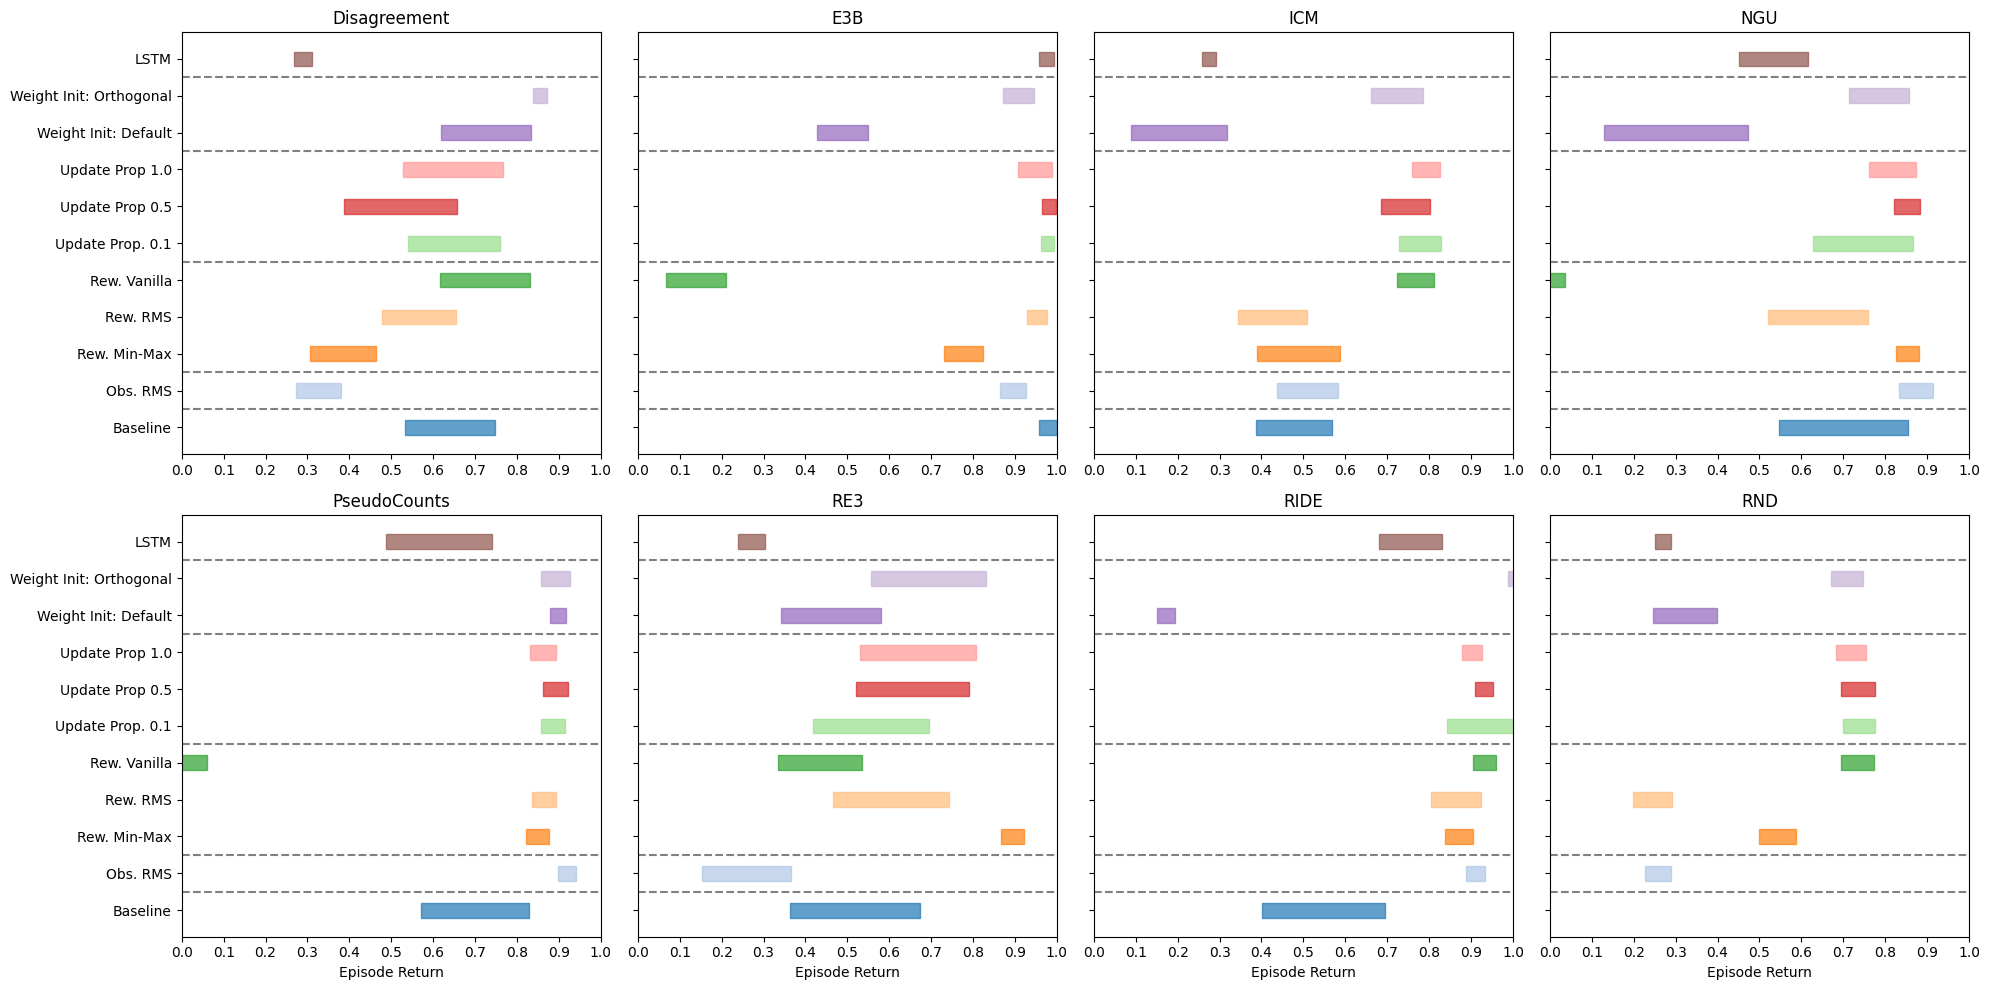

In [58]:
# Plotting
fig, ax = plt.subplots(2, 4, figsize=(20, 10), sharey=True)
y_labels_names = ["Baseline", "Obs. RMS", "Rew. Min-Max", "Rew. RMS", "Rew. Vanilla", "Update Prop. 0.1", "Update Prop 0.5", "Update Prop 1.0", "Weight Init: Default", "Weight Init: Orthogonal", "LSTM"]

for i, algo in enumerate(algos):
    subset = df[df['Algorithm'] == algo]
    col_idx = i % 4
    row_idx = i // 4
    ax[row_idx, col_idx].errorbar(subset['mean_normalized'], subset['RQ'], xerr=subset['std_normalized'], fmt='none', color=cmap(i), alpha=0)
    for j, (_, row) in enumerate(subset.iterrows()):
        color = cmap(j)  # Using modulo with length of subset to ensure cycling through colors
        ax[row_idx, col_idx].add_patch(Rectangle((row['mean_normalized'] - row['std_normalized'], j - 0.2), row['std_normalized'] * 2, 0.4, color=color, alpha=0.7))
    ax[row_idx, col_idx].set_title(algo)
    
    # draw horizontal dashed lines for between each RQ
    ax[row_idx, col_idx].axhline(0.5, color='gray', linestyle='--')
    ax[row_idx, col_idx].axhline(1.5, color='gray', linestyle='--')
    ax[row_idx, col_idx].axhline(4.5, color='gray', linestyle='--')
    ax[row_idx, col_idx].axhline(7.5, color='gray', linestyle='--')
    ax[row_idx, col_idx].axhline(9.5, color='gray', linestyle='--')
    
    # x ticks should go from 0.1 to .9
    ax[row_idx, col_idx].set_xlim(0, 1)
    ax[row_idx, col_idx].set_xticks(np.linspace(0, 1, 11))
    
    
# Show x-axis labels only in the last row
for ax in ax[1, :]:
    ax.set_xlabel('Episode Return')

ax.set_yticklabels(y_labels_names)  # Set y-axis labels for the first subplot

plt.tight_layout()
plt.show()

# Best Curves (Figure 1)

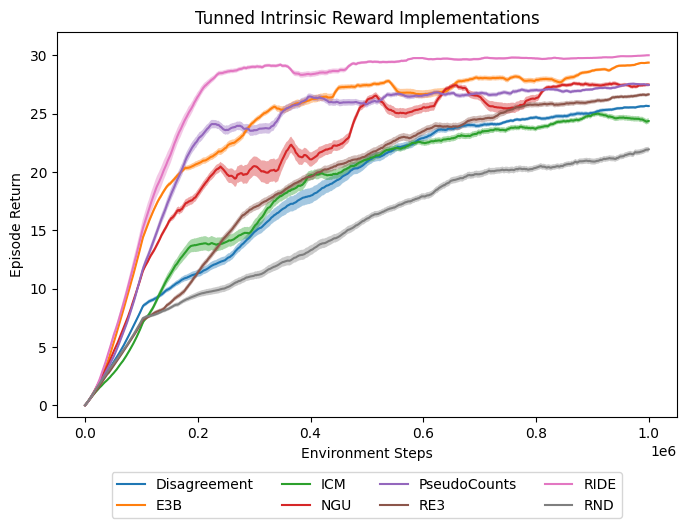

In [73]:
data_dir = "/home/roger/Desktop/rllte/best_mario_configs"
algorithms = ["Extrinsic", "RND", "ICM", "E3B", "PseudoCounts", "RIDE", "RE3", "NGU", "Disagreement"]
# Initialize an empty list to store dataframes for each experiment
dfs = []

# Loop through each subfolder
for subdir in os.listdir(data_dir):
    # Define the path to the current subfolder
    subfolder_path = os.path.join(data_dir, subdir)
    
    # Check if it's a directory
    if os.path.isdir(subfolder_path):
        # Loop through each file in the subfolder
        for file in os.listdir(subfolder_path):
            if file == ".DS_Store":
                continue

            try:
                # Define the path to the file
                file_path = os.path.join(subfolder_path, file)

                seed = file_path.split("_")[-1][-1]
                if ".DS_Store" in nested:
                    nested.remove(".DS_Store")
                nested = nested[0]
                
                file_path = os.path.join(file_path, "train.log")
                
                algo_name = None
                for element in algorithms:
                    if element.lower() in file_path:
                        algo_name = element
                        
                        
                # Read the data from the file into a dataframe
                df = pd.read_csv(file_path)

                # Add a column to identify the algorithm
                df['RQ'] = subdir
                df["Algorithm"] = algo_name
                df['Seed'] = seed
                
                # Append the dataframe to the list
                dfs.append(df)
            except:
                print("Error with file: ", file_path)
                continue
            
# Concatenate all dataframes into a single dataframe
data = pd.concat(dfs, ignore_index=True)

# aggregate by seed
summary_stats = data.groupby(['step', 'Algorithm'])['episode_reward'].agg(['mean', 'std']).reset_index()

# plot curves
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
for algo in sorted(np.unique(summary_stats['Algorithm'])):
    subset = summary_stats[summary_stats['Algorithm'] == algo]
    mean_reward = subset['mean']
    std_reward = subset['std']
    
    window = 1000

    # append 0s at the beginning
    mean_reward = np.concatenate(([0] * window, mean_reward))
    std_reward = np.concatenate(([0] * window, std_reward))
    
    # smooth with np.convolve
    mean_reward = np.convolve(mean_reward, np.ones(window)/window, mode='valid')
    std_reward = np.convolve(std_reward, np.ones(window)/window, mode='valid') / 4
    
    x_axis = np.linspace(0, 1_000_000, len(mean_reward))
    ax.plot(x_axis, mean_reward, label=algo)
    ax.fill_between(x_axis, mean_reward - std_reward, mean_reward + std_reward, alpha=0.4)
    
    
plt.ylim(-1, 32)

# put legend in one row bottom center
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.125), ncol=4, fancybox=True)
plt.xlabel('Environment Steps')
plt.ylabel('Episode Return')
plt.title("Tunned Intrinsic Reward Implementations")
plt.show()


# Figure 1 (worst curves)

Error with file:  /home/roger/Desktop/rllte/baseline_mario_configs/PPO_SuperMarioBros-1-1-v3_extrinsic_obsRMS:False_rewNorm:rms_updateProp:1.0_rff:False_s1/2024-02-12-05-32-43/train.log


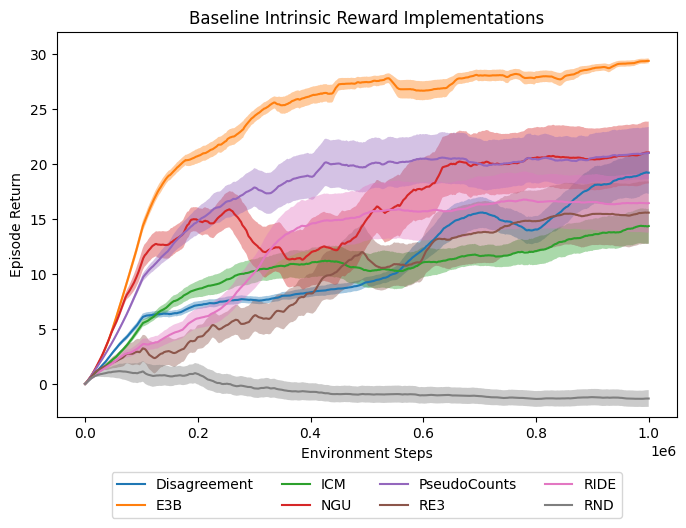

In [74]:
data_dir = "/home/roger/Desktop/rllte/baseline_mario_configs"
algorithms = ["RND", "ICM", "E3B", "PseudoCounts", "RIDE", "RE3", "NGU", "Disagreement"]
# Initialize an empty list to store dataframes for each experiment
dfs = []

# Loop through each subfolder
for subdir in os.listdir(data_dir):
    # Define the path to the current subfolder
    subfolder_path = os.path.join(data_dir, subdir)
    
    # Check if it's a directory
    if os.path.isdir(subfolder_path):
        # Loop through each file in the subfolder
        for file in os.listdir(subfolder_path):
            if file == ".DS_Store":
                continue

            try:
                # Define the path to the file
                file_path = os.path.join(subfolder_path, file)

                seed = file_path.split("_")[-1][-1]
                if ".DS_Store" in nested:
                    nested.remove(".DS_Store")
                nested = nested[0]
                
                file_path = os.path.join(file_path, "train.log")
                
                algo_name = None
                for element in algorithms:
                    if element.lower() in file_path:
                        algo_name = element
                        
                        
                # Read the data from the file into a dataframe
                df = pd.read_csv(file_path)

                # Add a column to identify the algorithm
                df['RQ'] = subdir
                df["Algorithm"] = algo_name
                df['Seed'] = seed
                
                # Append the dataframe to the list
                dfs.append(df)
            except:
                print("Error with file: ", file_path)
                continue
            
# Concatenate all dataframes into a single dataframe
data = pd.concat(dfs, ignore_index=True)

# aggregate by seed
summary_stats = data.groupby(['step', 'Algorithm'])['episode_reward'].agg(['mean', 'std']).reset_index()

# plot curves
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
for algo in sorted(np.unique(summary_stats['Algorithm'])):
    subset = summary_stats[summary_stats['Algorithm'] == algo]
    mean_reward = subset['mean']
    std_reward = subset['std']
    
    window = 1000

    # append 0s at the beginning
    mean_reward = np.concatenate(([0] * window, mean_reward))
    std_reward = np.concatenate(([0] * window, std_reward))
    
    # smooth with np.convolve
    mean_reward = np.convolve(mean_reward, np.ones(window)/window, mode='valid')
    std_reward = np.convolve(std_reward, np.ones(window)/window, mode='valid') / 4
    
    x_axis = np.linspace(0, 1_000_000, len(mean_reward))
    ax.plot(x_axis, mean_reward, label=algo)
    ax.fill_between(x_axis, mean_reward - std_reward, mean_reward + std_reward, alpha=0.4)
    
    
plt.ylim(-3, 32)

# put legend in one row bottom center
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.125), ncol=4, fancybox=True)
plt.xlabel('Environment Steps')
plt.ylabel('Episode Return')
plt.title("Baseline Intrinsic Reward Implementations")
plt.show()


# RQ 7 and 8: Contextual MDPs and Mixed Rewards

In [61]:
data_dir = "/home/roger/Desktop/rllte/marioRandomStages_q578"

algorithms = ["Extrinsic", "RND", "ICM", "E3B", "PseudoCounts", "RIDE", "RE3", "NGU", "Disagreement"]
algorithms_mixed = ["E3B+ICM", "E3B+RND", "E3B+RIDE", "ICM+RIDE", "ICM+RND", "RE3+ICM", "RE3+RND", "RE3+RIDE" "RIDE+RND"]

dfs = []

# Loop through each subfolder
for subdir in os.listdir(data_dir):
    # Define the path to the current subfolder
    subfolder_path = os.path.join(data_dir, subdir)
    
    # Check if it's a directory
    if os.path.isdir(subfolder_path):
        # Loop through each file in the subfolder
        for file in os.listdir(subfolder_path):
            if file == ".DS_Store":
                continue
            
            algo_name = None
            for algo in algorithms_mixed:
                if algo.lower() in file:
                    algo_name = algo
            
            if algo_name is None:
                for element in algorithms:
                    if element.lower() in file:
                        algo_name = element
                        
            try:
                # Define the path to the file
                file_path = os.path.join(subfolder_path, file)
                nested = os.listdir(file_path)

                seed = file_path.split("_")[-1][-1]
                if ".DS_Store" in nested:
                    nested.remove(".DS_Store")
                nested = nested[0]
                
                file_path = os.path.join(file_path, nested, "train.log")
                # Read the data from the file into a dataframe
                df = pd.read_csv(file_path)

                # Add a column to identify the algorithm
                df['RQ'] = subdir
                df["Algorithm"] = algo_name
                df['Seed'] = seed
                df['Has_Plus'] = df['Algorithm'].str.contains('\+')
                
                # keep last 100 episodes
                df = df.iloc[-1000:]
                
                # Append the dataframe to the list
                dfs.append(df)
            except:
                print("Error with file: ", file_path)
                continue
            
# Concatenate all dataframes into a single dataframe
data = pd.concat(dfs, ignore_index=True)


In [62]:
# compute the mean and std only on the last 100 episodes
summary_stats = data.groupby(['Algorithm', 'Has_Plus'])['episode_reward'].agg(['mean', 'std']).reset_index()
summary_stats['mean_normalized'] = (summary_stats['mean'] - 0) / (30 - 0)  # Min-max normalization
summary_stats['std_normalized'] = (summary_stats['std'] - 0) / (30 - 0)  / 4 # Min-max normalization 
df = summary_stats
df = df.sort_values(by='Has_Plus', ascending=False).drop(columns='Has_Plus')


# remove extrinsic 
df = df[df['Algorithm'] != 'Extrinsic']

algos = np.unique(df['Algorithm'])

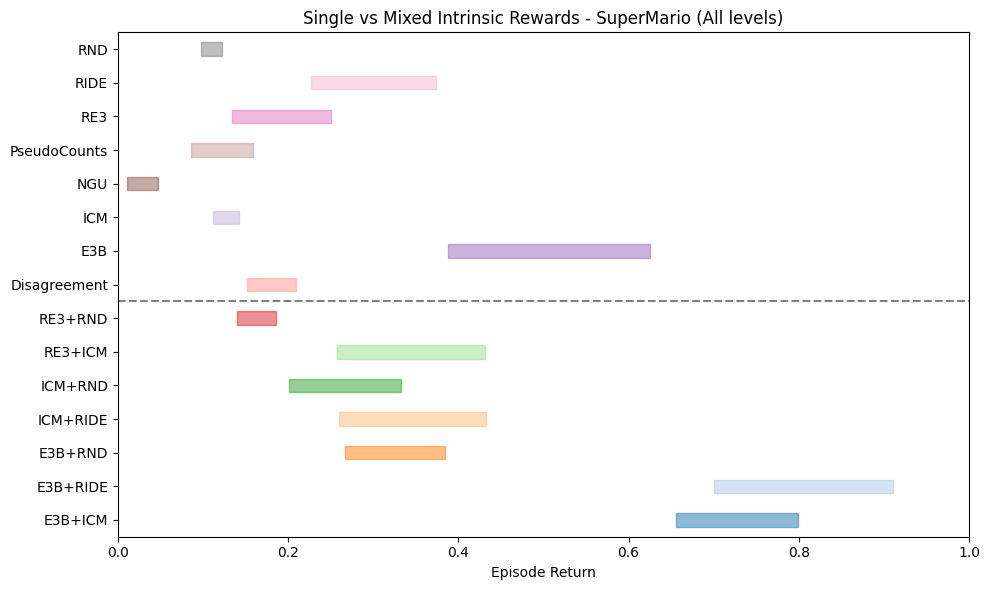

In [63]:

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

y_labels_names = df['Algorithm']

for i, (_, row) in enumerate(df.iterrows()):
    color = cmap(i % 20)  # Using modulo with length of cmap to ensure cycling through colors
    ax.add_patch(Rectangle((row['mean_normalized'] - row['std_normalized'], i - 0.2), row['std_normalized'] * 2, 0.4, color=color, alpha=0.5))

ax.set_yticks(np.arange(len(df)))
ax.set_yticklabels(y_labels_names)
ax.set_xlabel('Episode Return')
ax.set_title('Single vs Mixed Intrinsic Rewards - SuperMario (All levels)')
ax.set_ylim(-0.5, len(df) - 0.5)

ax.axhline(6.5, color='gray', linestyle='--')

plt.tight_layout()
plt.show()


# R8 mixed Rewards in Mario 1-1 

In [64]:
data_dir = "/home/roger/Desktop/rllte/mario_mixed"

algorithms = ["E3B+ICM", "E3B+RND", "E3B+RIDE", "ICM+RIDE", "ICM+RND", "RE3+ICM", "RE3+RND", "RE3+RIDE" "RIDE+RND"]
# Initialize an empty list to store dataframes for each experiment
dfs = []
cmap = get_cmap('tab20')

# Loop through each subfolder
for subdir in os.listdir(data_dir):
    # Define the path to the current subfolder
    subfolder_path = os.path.join(data_dir, subdir)
    
    # Check if it's a directory
    if os.path.isdir(subfolder_path):
        # Loop through each file in the subfolder
        for file in os.listdir(subfolder_path):
            if file == ".DS_Store":
                continue
            
            algo_name = None
            for element in algorithms:
                if element.lower() in file:
                    algo_name = element

            try:
                # Define the path to the file
                file_path = os.path.join(subfolder_path, file)
                nested = os.listdir(file_path)

                seed = file_path.split("_")[-1][-1]
                if ".DS_Store" in nested:
                    nested.remove(".DS_Store")
                nested = nested[0]
                
                file_path = os.path.join(file_path, nested, "train.log")
                # Read the data from the file into a dataframe
                df = pd.read_csv(file_path)

                # Add a column to identify the algorithm
                df['RQ'] = subdir
                df["Algorithm"] = algo_name
                df['Seed'] = seed
                
                # keep last 100 episodes
                df = df.iloc[-1000:]
                
                # Append the dataframe to the list
                dfs.append(df)
            except:
                print("Error with file: ", file_path)
                continue
            
# Concatenate all dataframes into a single dataframe
data = pd.concat(dfs, ignore_index=True)


/tmp/ipykernel_2496899/3850933589.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('tab20')


In [65]:

# compute the mean and std only on the last 100 episodes
summary_stats = data.groupby(['RQ', 'Algorithm'])['episode_reward'].agg(['mean', 'std']).reset_index()
summary_stats['mean_normalized'] = (summary_stats['mean'] - 0) / (30 - 0)  # Min-max normalization
summary_stats['std_normalized'] = (summary_stats['std'] - 0) / (30 - 0)  / 2# Min-max normalization 
df = summary_stats

# remove extrinsic 
df = df[df['Algorithm'] != 'Extrinsic']

algos = np.unique(df['Algorithm'])
RQs = np.unique(df['RQ'])

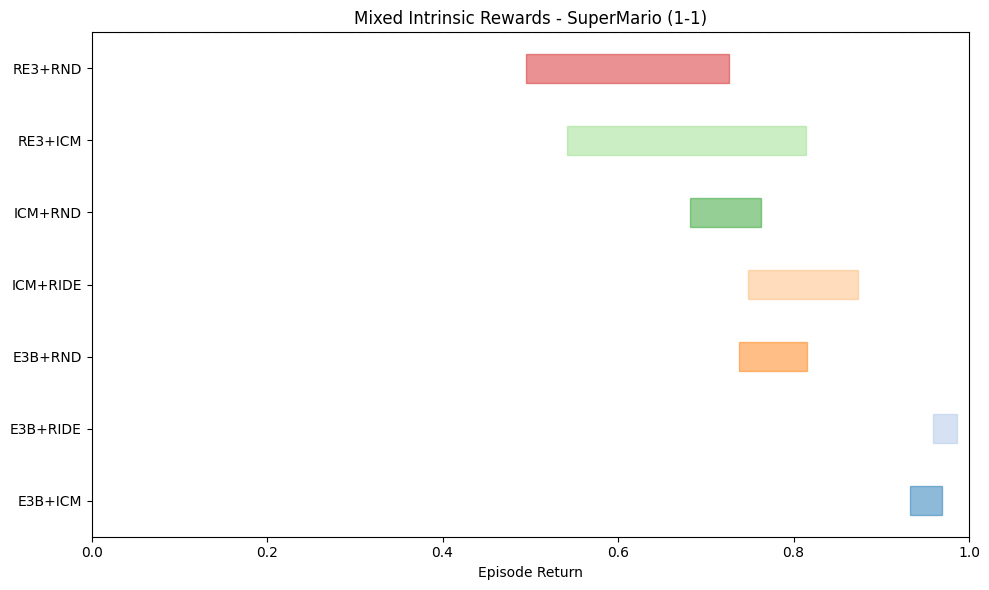

In [66]:

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

y_labels_names = df['Algorithm']

for i, (_, row) in enumerate(df.iterrows()):
    color = cmap(i % 20)  # Using modulo with length of cmap to ensure cycling through colors
    ax.add_patch(Rectangle((row['mean_normalized'] - row['std_normalized'], i - 0.2), row['std_normalized'] * 2, 0.4, color=color, alpha=0.5))

ax.set_yticks(np.arange(len(df)))
ax.set_yticklabels(y_labels_names)
ax.set_xlabel('Episode Return')
ax.set_title('Mixed Intrinsic Rewards - SuperMario (1-1)')
ax.set_ylim(-0.5, len(df) - 0.5)

ax.axhline(6.5, color='gray', linestyle='--')

plt.tight_layout()
plt.show()
